<a href="https://colab.research.google.com/github/applesyeda/sales-predictions/blob/main/Project_1_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Uploading my data 
import pandas as pd
df = pd.read_csv('/content/sales_predictions.csv')

In [3]:
#Mouting my data 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Uploading my libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
#Checking the first 5 rows of my data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#Assessing variable types and missing data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Seeing how many missing values per variable 
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

I can see above that the only variables with missing data are Item_Weight and Outlet_Size. I have chosen to drop these two columns because I don't see that they would be nessesary in my dataset. My goal is to assess for changes in sales, and see what companies can do if variables contributig to those changes can be idenified. However, if the weight of an item was a predictor of how much money would be made in sales, retail stores wouldn't nessarily have the power to change the weight of an item. Nor could they change the size of their store. Plus, I can also use the outlet type variable, that has no missing values, could be used instead to see if sale increases are associated with that, which may also account for the size of the retailer.  That being said, I think it's reasonable to drop the Item Weight and Outlet Size columns. 

In [8]:
#Dropping the Item Weight column
df.drop(columns="Item_Weight", inplace=True)
#Dropping the Outlet Size column
df.drop(columns="Outlet_Size", inplace=True)

In [9]:
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
#Checking the data
df.sample(5)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2822,FDZ19,Low Fat,0.093984,Fruits and Vegetables,175.5712,OUT017,2007,Tier 2,Supermarket Type1,1230.3984
1447,FDX10,Regular,0.123961,Snack Foods,33.2874,OUT045,2002,Tier 2,Supermarket Type1,141.1496
366,FDD44,Regular,0.078386,Fruits and Vegetables,256.4646,OUT035,2004,Tier 2,Supermarket Type1,5153.2920
1064,FDM28,Low Fat,0.075662,Frozen Foods,181.3660,OUT010,1998,Tier 3,Grocery Store,179.7660
6168,DRJ24,Low Fat,0.113505,Soft Drinks,186.8924,OUT049,1999,Tier 1,Supermarket Type1,2961.4784


Now I will find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)

In [12]:
df.nunique()

Item_Identifier              1559
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [13]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
# Standardize the values in the Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    3006
LF          316
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    3006
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [17]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [18]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [19]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [20]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

I first created the below graph because I would like to see if there's a difference in sales between low fat items and regular items. Just by eye-balling it, the medians look about the same. There seems to be a slightly greater range (including outliers) with low fat items compared to regular. I think asssessing for this is important because if there were changes, I could investigate further if those were significant, and that may change the way retailers advertise their products. For instance, if it's found that customers tend to choose the lower fat option, retailers could advertise their lower caloried or health-consious items more to further appeal to those people and drive sales. 

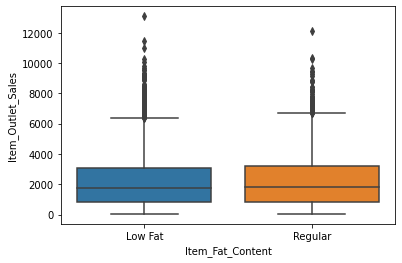

In [21]:
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales');

I would also like to look into outlet types and sales. This is important because it could be that larger stores may lead to more customers with more options, resulting in a greater number of sales. It could then be effective to assess for calculations on how much a retailer invests in a store type and it's proportions to sales revenue. In the below graph, I can see Supermarket Type 3 has the highest in sales compared to all other outlet types. This may influence how future stores are developed as retailers may be better off creating and investing resources in large supermarkets, rather then grocery stores. 

Reference: https://stackoverflow.com/questions/31859285/rotate-tick-labels-for-seaborn-barplot

https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot

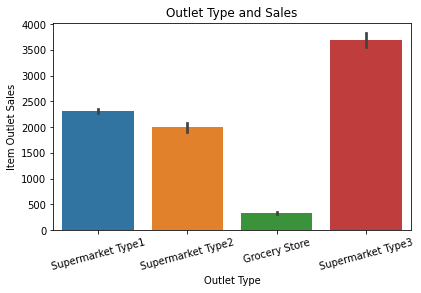

In [22]:
ax = sns.barplot(data=df, y="Item_Outlet_Sales", x= "Outlet_Type")
plt.xticks(rotation=15)
plt.tight_layout()
ax.set(xlabel='Outlet Type', ylabel='Item Outlet Sales', title = 'Outlet Type and Sales');

Lastly, I have created a heat wave to assess for correlations in my data set. There are no correlations that stand out, except for a moderate correlation between Item Outlet Sales and Item MRP. This is interesting because even though correlation doesn't equal causation, this finding could inspire further research in how materials used when making an item (MRP) could be associated with sales revenue. If there are any causal findings in further research, this may change the relatioshhip retailers have with vendors as they might change the type of material they'd request or products depending on it's association to sales revenue. 

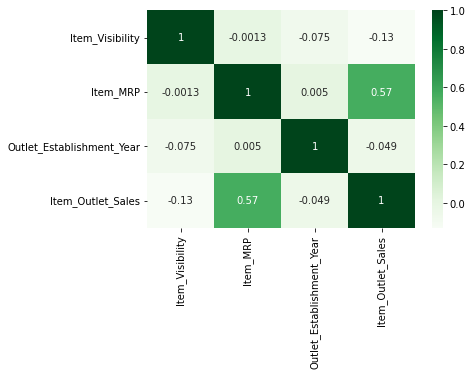

In [23]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)